In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install tensorflow

In [3]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load('en_core_web_sm')
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
true_data=pd.read_csv('/content/drive/MyDrive/csvfiles/True.csv')
fake_data=pd.read_csv('/content/drive/MyDrive/csvfiles/Fake.csv')

In [5]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
true_data['label']=1
fake_data['label']=0
data=pd.concat([true_data,fake_data])
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


<ipython-input-7-1182761ec185>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label',data=data,palette='Blues_r')


Text(0.5, 1.0, 'fake news vs true news')

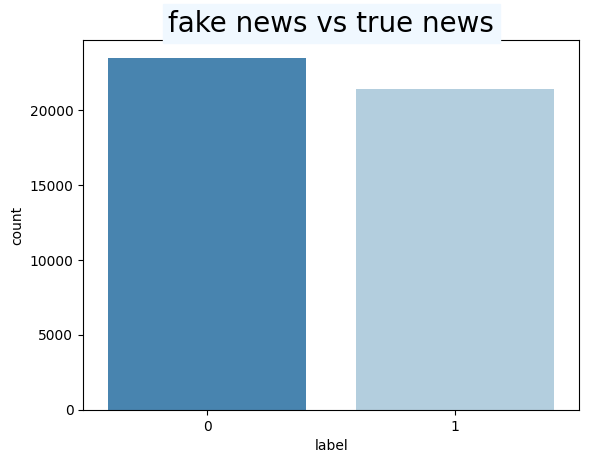

In [7]:
sns.countplot(x='label',data=data,palette='Blues_r')
plt.title('fake news vs true news',fontsize='20',backgroundcolor='aliceblue')

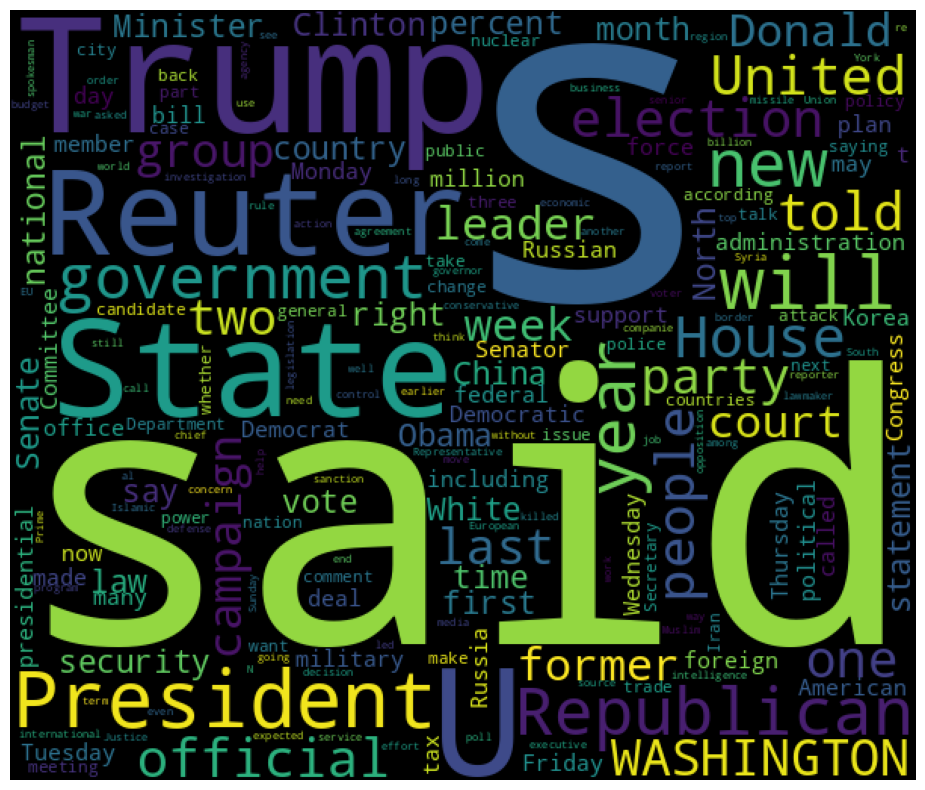

In [8]:
true_text = " ".join(i for i in true_data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=600,height=510,stopwords=stopwords,collocations=False).generate(true_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


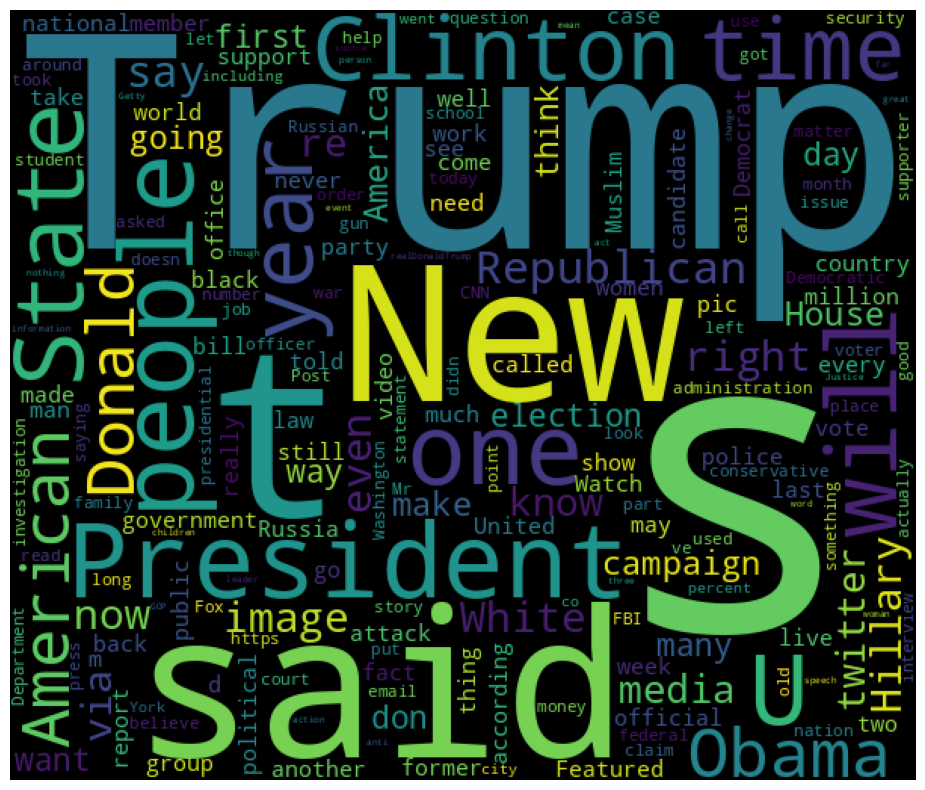

In [9]:
fake_text = " ".join(i for i in fake_data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=600,height=510,stopwords=stopwords,collocations=False).generate(fake_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [11]:
data.isnull().sum()


,0
title,0
text,0
subject,0
date,0
label,0


In [12]:
data.duplicated().sum()

np.int64(209)

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.subject.value_counts()

,count
subject,
politicsNews,11220
worldnews,9991
News,9050
politics,6838
left-news,4459
Government News,1570
US_News,783
Middle-east,778


[Text(0.5, 1.0, 'Subject frequencies ')]

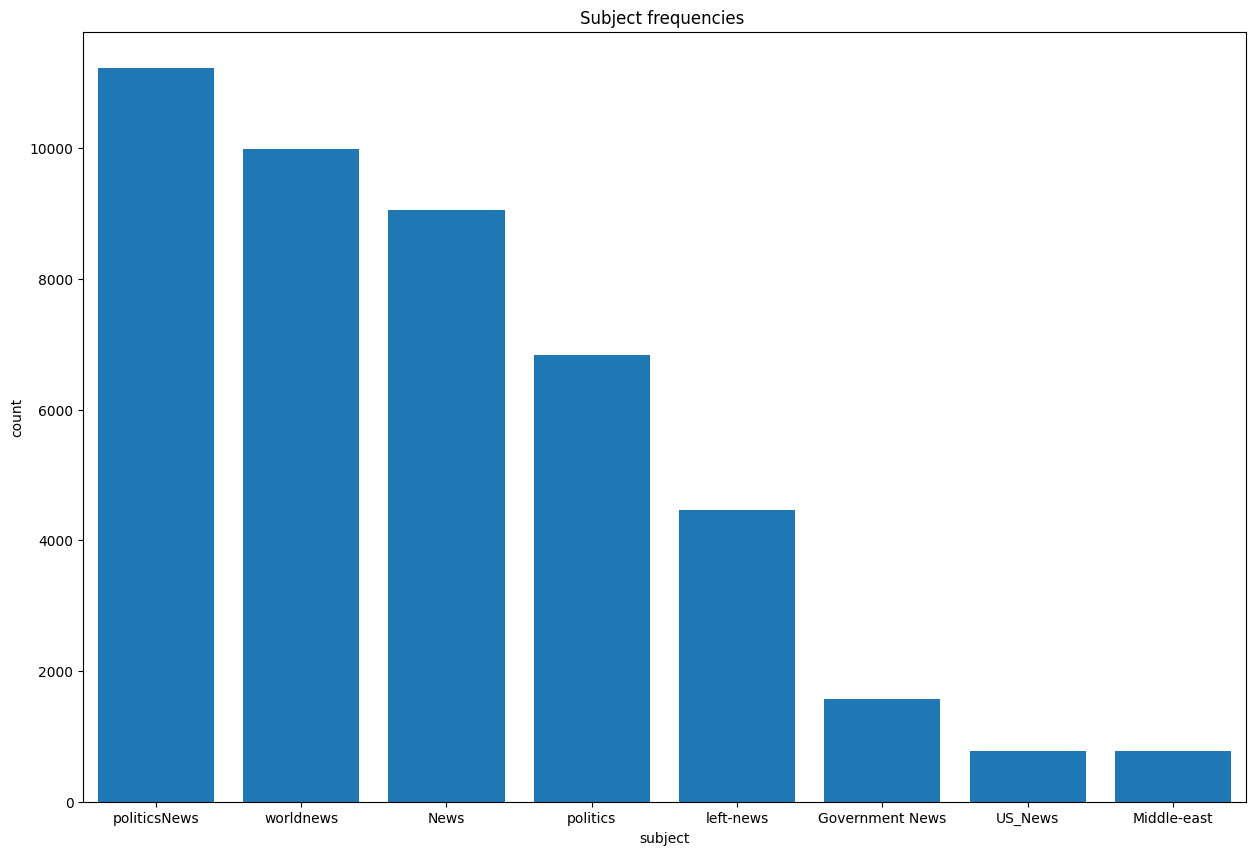

In [15]:
plt.figure(figsize=[15,10],clear=True)
sns.barplot(x=data['subject'].value_counts().index,
            y=data['subject'].value_counts(),
            saturation=1).set(title='Subject frequencies ')

In [16]:
data=data.sample(frac = 1,random_state=42).reset_index(drop=True)
data.head()

,title,text,subject,date,label
0,"Merkel, Juncker discuss Catalan crisis: EU off...",BRUSSELS (Reuters) - German Chancellor Angela ...,worldnews,"October 7, 2017",1
1,LIBERAL HACK KATIE COURIC Says Fake News Is “T...,Katie Couric is a wolf in sheep s clothing. Da...,left-news,"Jul 22, 2017",0
2,TRUMP WAS RIGHT! Audit Reveals State Dept. Cyb...,New documents appear to show a pattern of dete...,politics,"Oct 19, 2015",0
3,Clay Aiken Says He Was A ‘F*****g Dumbass’ Fo...,Former American Idol finalist and Celebrity...,News,"August 16, 2017",0
4,U.S. militia girds for trouble as presidential...,"JACKSON, Ga. (Reuters) - Down a Georgia count...",politicsNews,"November 2, 2016",1


In [17]:
data=data.drop(labels=['title','subject','date'],axis=1)
data.head()

,text,label
0,BRUSSELS (Reuters) - German Chancellor Angela ...,1
1,Katie Couric is a wolf in sheep s clothing. Da...,0
2,New documents appear to show a pattern of dete...,0
3,Former American Idol finalist and Celebrity...,0
4,"JACKSON, Ga. (Reuters) - Down a Georgia count...",1


In [18]:
# removing stopwords
data['cleaned_text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [19]:
# lemmatization by spacy

lemma = []
for text in nlp.pipe(data['cleaned_text'], batch_size=100, n_process=3):
    if text.has_annotation("DEP"):
        lemma.append([n.lemma_ for n in text])
    else:
        lemma.append(None)


In [20]:
data['lemma'] = lemma
data

,text,label,cleaned_text,lemma
0,BRUSSELS (Reuters) - German Chancellor Angela ...,1,BRUSSELS (Reuters) - German Chancellor Angela ...,"[BRUSSELS, (, Reuters, ), -, German, Chancello..."
1,Katie Couric is a wolf in sheep s clothing. Da...,0,"Katie Couric wolf sheep clothing. Dan Rather, ...","[Katie, couric, wolf, sheep, clothing, ., Dan,..."
2,New documents appear to show a pattern of dete...,0,New documents appear show pattern deterioratio...,"[new, document, appear, show, pattern, deterio..."
3,Former American Idol finalist and Celebrity...,0,Former American Idol finalist Celebrity Appren...,"[former, american, Idol, finalist, Celebrity, ..."
4,"JACKSON, Ga. (Reuters) - Down a Georgia count...",1,"JACKSON, Ga. (Reuters) - Down Georgia country ...","[JACKSON, ,, Ga., (, Reuters, ), -, Down, Geor..."
...,...,...,...,...
44684,BERLIN (Reuters) - German Finance Minister Wol...,1,BERLIN (Reuters) - German Finance Minister Wol...,"[BERLIN, (, Reuters, ), -, german, Finance, Mi..."
44685,"PUERTO ORDAZ, Venezuela (Reuters) - Venezuelan...",1,"PUERTO ORDAZ, Venezuela (Reuters) - Venezuelan...","[PUERTO, ORDAZ, ,, Venezuela, (, Reuters, ), -..."
44686,The U.S. is the great enemy of mankind! rave...,0,The U.S. great enemy mankind! raved Ernesto Ch...,"[the, U.S., great, enemy, mankind, !, rave, Er..."
44687,NEW YORK (Reuters) - U.S. money managers with ...,1,NEW YORK (Reuters) - U.S. money managers reins...,"[NEW, YORK, (, Reuters, ), -, U.S., money, man..."


In [21]:
  # Lemmatized cleaned_text re-joined (list to cleaned_text)
data['cleaned_text'] = data['lemma'].apply(' '.join)

In [22]:
# Split the data to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.cleaned_text,data.label,shuffle=True)

print ("Training set shapes:", x_train.shape, y_train.shape)
print ("Test set shapes:", x_test.shape, y_test.shape)

Training set shapes: (33516,) (33516,)
Test set shapes: (11173,) (11173,)


In [23]:
# normlization data :
def normlize(data):
    normlized=[]
    for sample in data:
        sample=sample.lower() #lowercase all words
        sample=re.sub(r'(\w)\1+|(.)\1+',r'\1',sample) # remove duplicate_characters
        sample= re.sub(r'\d+','',sample) #remove numbers
        sample=re.sub(r'[^\w\s]',"",sample)#removing_punctuations
        sample=re.sub("\s\s+" , " ", sample)#removing multiple_spaces
        normlized.append(sample)
    return normlized

In [24]:
# make normlization process in training and testing data
x_train=normlize(x_train)
x_test=normlize(x_test)

In [25]:
max_vocab=10000
max_len=300 # maximum lenght of sentence
epochs = 10
embed_size = 128

In [26]:
#Tokenizer the text to vectors
tokenizer=Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

In [27]:
# tokenize train and test data
x_train=tokenizer.texts_to_sequences(x_train)
x_test=tokenizer.texts_to_sequences(x_test)

In [28]:
# padding the text to have the same length in the article
x_train=tf.keras.preprocessing.sequence.pad_sequences(x_train,padding='post',maxlen=max_len)
x_test=tf.keras.preprocessing.sequence.pad_sequences(x_test,padding='post',maxlen=max_len)

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = {}

def store_dl_model_results(name, model, history, loss_train, acc_train, loss_test, acc_test):
    y_pred = (model.predict(x_test) > 0.5).astype("int32")
    results[name] = {
        "Train Loss": round(loss_train, 4),
        "Train Accuracy": round(acc_train, 4),
        "Test Loss": round(loss_test, 4),
        "Test Accuracy": round(acc_test, 4),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }


**Uni-LSTM**

In [30]:
import tensorflow as tf

LSTM_model_uni = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_vocab, output_dim=embed_size, input_length=max_len),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

LSTM_model_uni.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
early_stop_uni = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2,restore_best_weights=False)

LSTM_model_uni.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])

history_LSTM_uni=LSTM_model_uni.fit(x_train, y_train,epochs=epochs,validation_split=0.2,batch_size=30,shuffle=True,callbacks=[early_stop_uni])


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:780: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


894/894 ━━━━━━━━━━━━━━━━━━━━ 345s 380ms/step - accuracy: 0.6440 - loss: 0.6065 - val_accuracy: 0.8922 - val_loss: 0.3199
Epoch 2/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 389s 388ms/step - accuracy: 0.9003 - loss: 0.3162 - val_accuracy: 0.9232 - val_loss: 0.2473
Epoch 3/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 379s 384ms/step - accuracy: 0.9305 - loss: 0.2474 - val_accuracy: 0.9320 - val_loss: 0.2066
Epoch 4/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 388s 391ms/step - accuracy: 0.9381 - loss: 0.2118 - val_accuracy: 0.9518 - val_loss: 0.1876
Epoch 5/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 344s 385ms/step - accuracy: 0.9585 - loss: 0.1705 - val_accuracy: 0.9550 - val_loss: 0.1639
Epoch 6/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 342s 382ms/step - accuracy: 0.9367 - loss: 0.1855 - val_accuracy: 0.9493 - val_loss: 0.1258
Epoch 7/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 379s 379ms/step - accuracy: 0.9543 - loss: 0.1390 - val_accuracy: 0.9564 - val_loss: 0.1264
Epoch 8/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 348s 390ms/step - accuracy: 0.9462 - loss: 0.12

In [32]:
loss_train_uni, accuracy_train_uni = LSTM_model_uni.evaluate(x_train, y_train)
loss_test_uni, accuracy_test_uni = LSTM_model_uni.evaluate(x_test, y_test)

1048/1048 ━━━━━━━━━━━━━━━━━━━━ 97s 92ms/step - accuracy: 0.9691 - loss: 0.1048
350/350 ━━━━━━━━━━━━━━━━━━━━ 33s 93ms/step - accuracy: 0.9615 - loss: 0.1258


In [33]:
print('Results of Unidirectional LSTM model :')
print('In training data : Loss :', loss_train_uni, "  Accuracy: ", accuracy_train_uni)
print('In testing data : Loss :', loss_test_uni, "  Accuracy: ", accuracy_test_uni)

store_dl_model_results("Uni-LSTM", LSTM_model_uni, history_LSTM_uni, loss_train_uni, accuracy_train_uni, loss_test_uni, accuracy_test_uni)


Results of Unidirectional LSTM model :
In training data : Loss : 0.11107100546360016   Accuracy:  0.9674185514450073
In testing data : Loss : 0.1252189725637436   Accuracy:  0.9616038799285889
350/350 ━━━━━━━━━━━━━━━━━━━━ 33s 94ms/step


In [34]:
# plot function to visualize model
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

(0.0, 0.5113548718392849)

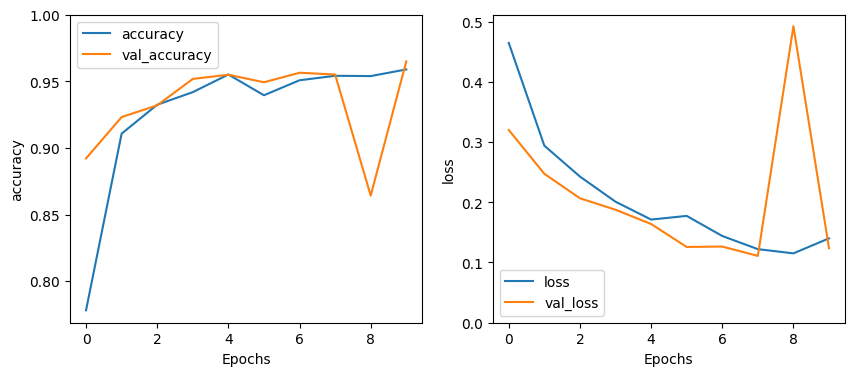

In [35]:
# plot accuracy and loss for lstm model
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_graphs(history_LSTM_uni, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_LSTM_uni, 'loss')
plt.ylim(0, None)

**Bi-LSTM**

In [36]:
tf.keras.backend.clear_session()

In [37]:
LSTM_model=tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab,output_dim=embed_size,input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)])

LSTM_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2,restore_best_weights=False)

In [39]:
LSTM_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])

history_LSTM=LSTM_model.fit(x_train,y_train,epochs= epochs,validation_split=0.2,batch_size=30,shuffle=True,callbacks=[early_stop])

Epoch 1/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 669s 738ms/step - accuracy: 0.7870 - loss: 0.3412 - val_accuracy: 0.9934 - val_loss: 0.0256
Epoch 2/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 696s 754ms/step - accuracy: 0.9958 - loss: 0.0199 - val_accuracy: 0.9954 - val_loss: 0.0150
Epoch 3/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 659s 737ms/step - accuracy: 0.9984 - loss: 0.0085 - val_accuracy: 0.9955 - val_loss: 0.0138
Epoch 4/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 687s 742ms/step - accuracy: 0.9994 - loss: 0.0046 - val_accuracy: 0.9960 - val_loss: 0.0151
Epoch 5/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 694s 756ms/step - accuracy: 0.9987 - loss: 0.0057 - val_accuracy: 0.9949 - val_loss: 0.0184


In [40]:
loss_train,accuracy_train=LSTM_model.evaluate(x_train,y_train)
loss_test,accuracy_test=LSTM_model.evaluate(x_test,y_test)

1048/1048 ━━━━━━━━━━━━━━━━━━━━ 169s 161ms/step - accuracy: 0.9993 - loss: 0.0029
350/350 ━━━━━━━━━━━━━━━━━━━━ 57s 163ms/step - accuracy: 0.9920 - loss: 0.0265


In [41]:
print('Results of Bi-LSTM model :')
print('In training data :Loss :', loss_train ,"  Accuracy: " ,accuracy_train)
print('In testing data : Loss : ',loss_test , "  Accuracy: ",accuracy_test)
store_dl_model_results("Bi-LSTM", LSTM_model, history_LSTM, loss_train, accuracy_train, loss_test, accuracy_test)



Results of Bi-LSTM model :
In training data :Loss : 0.0059310817159712315   Accuracy:  0.998478353023529
In testing data : Loss :  0.028102781623601913   Accuracy:  0.9923028945922852
350/350 ━━━━━━━━━━━━━━━━━━━━ 58s 163ms/step


(0.0, 0.16188949034549296)

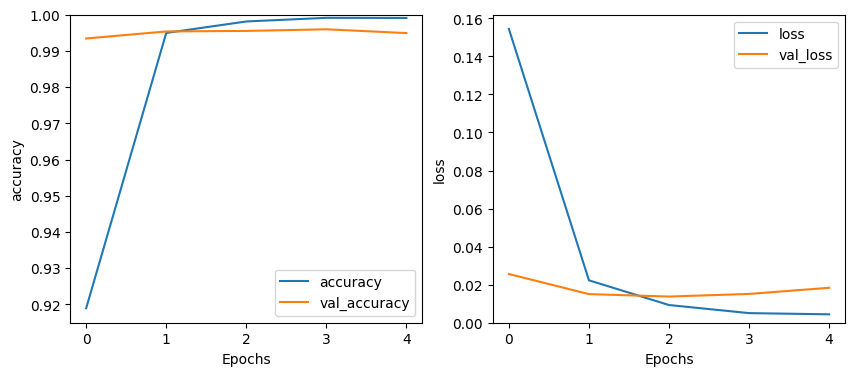

In [42]:
# plot accuracy and loss for lstm model
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_graphs(history_LSTM, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_LSTM, 'loss')
plt.ylim(0, None)

**Uni-GRU**

In [43]:
tf.keras.backend.clear_session()

In [44]:
GRU_model_uni = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, output_dim=embed_size, input_length=max_len),
    tf.keras.layers.GRU(64, return_sequences=True),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

GRU_model_uni.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
GRU_model_uni.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])

history_GRU_uni = GRU_model_uni.fit(x_train,y_train,epochs=epochs,validation_split=0.2,batch_size=30,shuffle=True,callbacks=[early_stop])


Epoch 1/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 414s 455ms/step - accuracy: 0.5372 - loss: 0.6704 - val_accuracy: 0.9018 - val_loss: 0.2782
Epoch 2/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 451s 466ms/step - accuracy: 0.9041 - loss: 0.3084 - val_accuracy: 0.9197 - val_loss: 0.2740
Epoch 3/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 437s 460ms/step - accuracy: 0.9159 - loss: 0.2660 - val_accuracy: 0.9266 - val_loss: 0.1909
Epoch 4/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 414s 463ms/step - accuracy: 0.9581 - loss: 0.1799 - val_accuracy: 0.9745 - val_loss: 0.1304
Epoch 5/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 436s 456ms/step - accuracy: 0.9702 - loss: 0.1500 - val_accuracy: 0.9739 - val_loss: 0.1229
Epoch 6/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 415s 464ms/step - accuracy: 0.9772 - loss: 0.1194 - val_accuracy: 0.9578 - val_loss: 0.1527
Epoch 7/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 444s 467ms/step - accuracy: 0.9706 - loss: 0.1229 - val_accuracy: 0.9678 - val_loss: 0.1120
Epoch 8/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 409s 458ms/step - accuracy: 0.9732 -

In [46]:
loss_train, accuracy_train = GRU_model_uni.evaluate(x_train, y_train)
loss_test, accuracy_test = GRU_model_uni.evaluate(x_test, y_test)


1048/1048 ━━━━━━━━━━━━━━━━━━━━ 92s 88ms/step - accuracy: 0.9835 - loss: 0.0653
350/350 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.9734 - loss: 0.0876


In [47]:
print('Results of GRU model (Unidirectional):')
print('In training data : Loss :', loss_train, "  Accuracy: ", accuracy_train)
print('In testing data  : Loss :', loss_test, "  Accuracy: ", accuracy_test)

store_dl_model_results("Uni-GRU", GRU_model_uni, history_GRU_uni, loss_train, accuracy_train, loss_test, accuracy_test)

Results of GRU model (Unidirectional):
In training data : Loss : 0.07104022800922394   Accuracy:  0.9819191098213196
In testing data  : Loss : 0.08767025917768478   Accuracy:  0.9735970497131348
350/350 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step


(0.0, 0.6174903877079487)

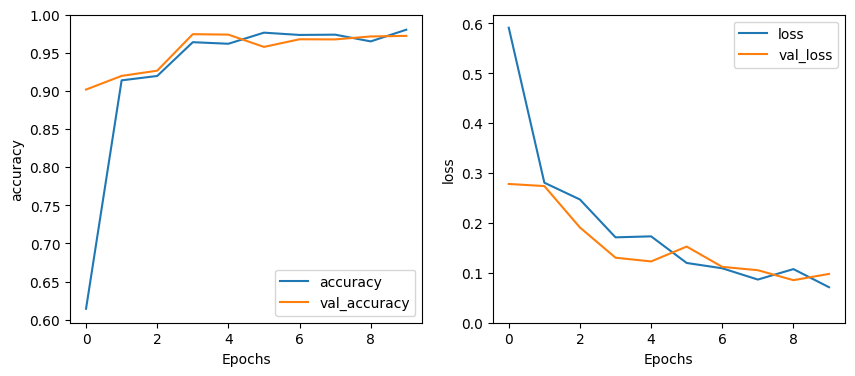

In [48]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_graphs(history_GRU_uni, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_GRU_uni, 'loss')
plt.ylim(0, None)

**Bi-GRU**

In [49]:
tf.keras.backend.clear_session()

In [50]:
GRU_model=tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab,output_dim=embed_size,input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    # tf.keras.layers.BatchNormalization(), # Layer that normalizes inputs
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)])

GRU_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
GRU_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])

history_GRU=GRU_model.fit(x_train,y_train,epochs= epochs,validation_split=0.2,batch_size=30,shuffle=True,callbacks=[early_stop])

Epoch 1/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 764s 842ms/step - accuracy: 0.7427 - loss: 0.3954 - val_accuracy: 0.9822 - val_loss: 0.0809
Epoch 2/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 799s 839ms/step - accuracy: 0.9896 - loss: 0.0401 - val_accuracy: 0.9922 - val_loss: 0.0202
Epoch 3/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 831s 872ms/step - accuracy: 0.9962 - loss: 0.0159 - val_accuracy: 0.9930 - val_loss: 0.0220
Epoch 4/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 786s 854ms/step - accuracy: 0.9971 - loss: 0.0106 - val_accuracy: 0.9881 - val_loss: 0.0239


In [52]:
loss_train,accuracy_train=GRU_model.evaluate(x_train,y_train)
loss_test,accuracy_test=GRU_model.evaluate(x_test,y_test)

1048/1048 ━━━━━━━━━━━━━━━━━━━━ 171s 163ms/step - accuracy: 0.9942 - loss: 0.0116
350/350 ━━━━━━━━━━━━━━━━━━━━ 57s 163ms/step - accuracy: 0.9866 - loss: 0.0281


In [53]:
print('Results of Bi-GRU model :')
print('In training data :Loss :', loss_train ,"  Accuracy: " ,accuracy_train)
print('In testing data : Loss : ',loss_test , "  Accuracy: ",accuracy_test)
store_dl_model_results("Bi-GRU", GRU_model, history_GRU, loss_train, accuracy_train, loss_test, accuracy_test)



Results of Bi-GRU model :
In training data :Loss : 0.014203679747879505   Accuracy:  0.9930182695388794
In testing data : Loss :  0.027871204540133476   Accuracy:  0.9872012734413147
350/350 ━━━━━━━━━━━━━━━━━━━━ 58s 164ms/step


(0.0, 0.2112079743295908)

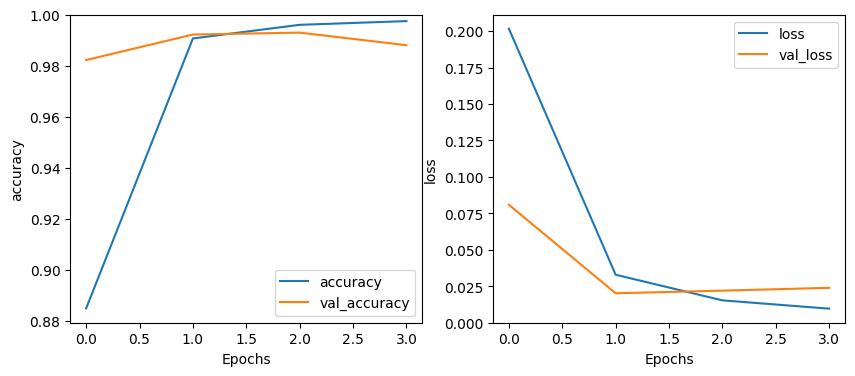

In [54]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_graphs(history_GRU, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_GRU, 'loss')
plt.ylim(0, None)

**CNN**

In [55]:
tf.keras.backend.clear_session()

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=max_vocab, output_dim=128, input_length=max_len))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history_CNN = cnn_model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


419/419 ━━━━━━━━━━━━━━━━━━━━ 118s 276ms/step - accuracy: 0.8825 - loss: 0.2409 - val_accuracy: 0.9945 - val_loss: 0.0155
Epoch 2/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 141s 274ms/step - accuracy: 0.9981 - loss: 0.0063 - val_accuracy: 0.9957 - val_loss: 0.0135
Epoch 3/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 143s 277ms/step - accuracy: 0.9998 - loss: 7.9741e-04 - val_accuracy: 0.9960 - val_loss: 0.0143
Epoch 4/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 119s 283ms/step - accuracy: 1.0000 - loss: 1.1044e-04 - val_accuracy: 0.9961 - val_loss: 0.0136


In [57]:
loss_train, accuracy_train = cnn_model.evaluate(x_train, y_train, verbose=0)
loss_test, accuracy_test = cnn_model.evaluate(x_test, y_test, verbose=0)
y_pred = (cnn_model.predict(x_test) > 0.5).astype("int32")


350/350 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step


In [58]:
print("Results of CNN model:")
print("In training data : Loss :", loss_train, "  Accuracy: ", accuracy_train)
print("In testing data  : Loss :", loss_test, "  Accuracy: ", accuracy_test)

store_dl_model_results("CNN", cnn_model, history_CNN, loss_train, accuracy_train, loss_test, accuracy_test)


Results of CNN model:
In training data : Loss : 0.003146891016513109   Accuracy:  0.9990750551223755
In testing data  : Loss : 0.009601597674190998   Accuracy:  0.9974939823150635
350/350 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step


(0.0, 0.09852858564299823)

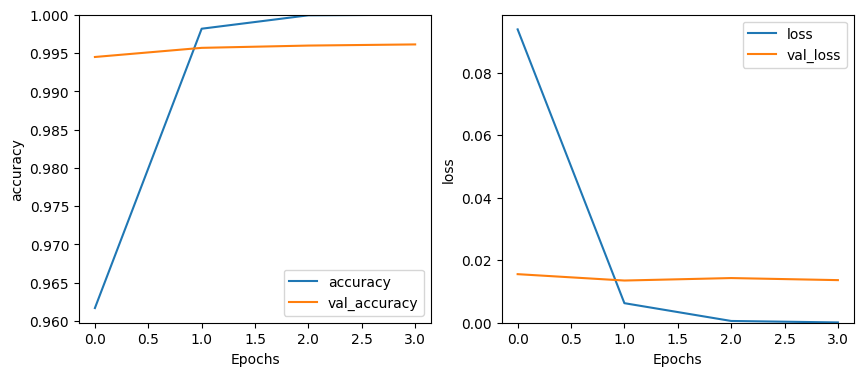

In [59]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_graphs(history_CNN, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_CNN, 'loss')
plt.ylim(0, None)

**ML Models**

In [60]:
ml_data = data.copy()

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

x_train_ml, x_test_ml, y_train_ml, y_test_ml = train_test_split(
    ml_data['cleaned_text'], ml_data['label'], test_size=0.25, shuffle=True, random_state=42
)
x_train_ml = pd.Series(x_train_ml)
x_test_ml = pd.Series(x_test_ml)
x_train_ml_list = x_train_ml.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x)).tolist()
x_test_ml_list = x_test_ml.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x)).tolist()

tfidf = TfidfVectorizer(max_features=300)
x_train_tfidf = tfidf.fit_transform(x_train_ml_list)
x_test_tfidf = tfidf.transform(x_test_ml_list)

count = CountVectorizer(max_features=300)
x_train_tf = count.fit_transform(x_train_ml_list)
x_test_tf = count.transform(x_test_ml_list)

models = {
    "SVM (C=1)": SVC(C=1),
    "Logistic Regression (C=1)": LogisticRegression(C=1, max_iter=1000),
    "Decision Tree (max_depth=5)": DecisionTreeClassifier(max_depth=5),
    "KNN (k=9)": KNeighborsClassifier(n_neighbors=9),
    "Random Forest 1 (n=400, depth=40)": RandomForestClassifier(n_estimators=400, max_depth=40),
}
rf2 = RandomForestClassifier(n_estimators=300, max_depth=40)

results_ml = {}
def evaluate_model(name, y_true, y_pred):
    results_ml[name] = {
        "Accuracy": round(accuracy_score(y_true, y_pred), 4),
        "Precision": round(precision_score(y_true, y_pred), 4),
        "Recall": round(recall_score(y_true, y_pred), 4),
        "F1-Score": round(f1_score(y_true, y_pred), 4)
    }

for name, model in models.items():
    model.fit(x_train_tfidf, y_train_ml)
    y_pred = model.predict(x_test_tfidf)
    evaluate_model(name, y_test_ml, y_pred)

rf2.fit(x_train_tf, y_train_ml)
y_pred_rf2 = rf2.predict(x_test_tf)
evaluate_model("Random Forest 2 (n=300, depth=40)", y_test_ml, y_pred_rf2)


In [61]:
results_df = pd.DataFrame(results).T
print("\nDL Model Comparison:")
display(results_df)
results_df1 = pd.DataFrame(results_ml).T
print("\nML Models Comparision:\n")
print(results_df1)



DL Model Comparison:


,Train Loss,Train Accuracy,Test Loss,Test Accuracy,Precision,Recall,F1-Score
Uni-LSTM,0.1111,0.9674,0.1252,0.9616,0.962386,0.956390,0.959379
Bi-LSTM,0.0059,0.9985,0.0281,0.9923,0.999042,0.984708,0.991824
Uni-GRU,0.0710,0.9819,0.0877,0.9736,0.992129,0.951860,0.971577
Bi-GRU,0.0142,0.9930,0.0279,0.9872,0.997875,0.975080,0.986346
CNN,0.0031,0.9991,0.0096,0.9975,0.997357,0.997357,0.997357



ML Models Comparision:

                                   Accuracy  Precision  Recall  F1-Score
SVM (C=1)                            0.9938     0.9930  0.9940    0.9935
Logistic Regression (C=1)            0.9842     0.9823  0.9843    0.9833
Decision Tree (max_depth=5)          0.9939     0.9899  0.9974    0.9936
KNN (k=9)                            0.8618     0.8771  0.8241    0.8497
Random Forest 1 (n=400, depth=40)    0.9974     0.9975  0.9970    0.9973
Random Forest 2 (n=300, depth=40)    0.9976     0.9974  0.9975    0.9975


In [62]:

from tabulate import tabulate
dl_table = []
for name, vals in results.items():
    dl_table.append({
        "Model": name,
        "Accuracy": vals.get("Test Accuracy", None),
        "Precision": vals.get("Precision", None),
        "Recall": vals.get("Recall", None),
        "F1-Score": vals.get("F1-Score", None)
    })
ml_table = []
for name, vals in results_ml.items():
    ml_table.append({
        "Model": name,
        "Accuracy": vals.get("Accuracy", None),
        "Precision": vals.get("Precision", None),
        "Recall": vals.get("Recall", None),
        "F1-Score": vals.get("F1-Score", None)
    })

final_table = pd.DataFrame(dl_table + ml_table)
final_table = final_table.set_index("Model")
print("\n📊 Final Combined Model Comparison:\n")
print(tabulate(final_table, headers='keys', tablefmt='fancy_grid', floatfmt=".4f"))




📊 Final Combined Model Comparison:

╒═══════════════════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model                             │   Accuracy │   Precision │   Recall │   F1-Score │
╞═══════════════════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Uni-LSTM                          │     0.9616 │      0.9624 │   0.9564 │     0.9594 │
├───────────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Bi-LSTM                           │     0.9923 │      0.9990 │   0.9847 │     0.9918 │
├───────────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Uni-GRU                           │     0.9736 │      0.9921 │   0.9519 │     0.9716 │
├───────────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Bi-GRU                            │     0.9872 │      0.9979 │   0.9751 │     0.9863 │
├───────────────────────────────────┼────────────┼─────────────┼─────────

**Stacked Model**

In [63]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

ml_preds = []
for name, model in models.items():
    y_pred = model.predict(x_test_tfidf)
    ml_preds.append(y_pred.reshape(-1, 1))

y_pred_rf2 = rf2.predict(x_test_tf)
ml_preds.append(y_pred_rf2.reshape(-1, 1))

dl_preds = []
dl_models = {
    "Bi-LSTM": LSTM_model,
    "Uni-LSTM": LSTM_model_uni,
    "Bi-GRU": GRU_model,
    "Uni-GRU": GRU_model_uni,
    "CNN": cnn_model,
}
for name, model in dl_models.items():
    preds = (model.predict(x_test) > 0.5).astype(int).reshape(-1, 1)
    dl_preds.append(preds)
meta_input = np.hstack(ml_preds + dl_preds)

meta_clf = RandomForestClassifier(n_estimators=300, max_depth=40, random_state=42)
meta_clf.fit(meta_input, y_test)
meta_preds = meta_clf.predict(meta_input)

print("\n📊 Final Stacked Model Evaluation:\n")
print(classification_report(y_test, meta_preds))
stacked_results = {
    "Accuracy": round(accuracy_score(y_test, meta_preds), 4),
    "Precision": round(precision_score(y_test, meta_preds), 4),
    "Recall": round(recall_score(y_test, meta_preds), 4),
    "F1-Score": round(f1_score(y_test, meta_preds), 4)
}
print("Stacked Model Results:", stacked_results)


350/350 ━━━━━━━━━━━━━━━━━━━━ 59s 168ms/step
350/350 ━━━━━━━━━━━━━━━━━━━━ 32s 91ms/step
350/350 ━━━━━━━━━━━━━━━━━━━━ 57s 163ms/step
350/350 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step
350/350 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step

📊 Final Stacked Model Evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5876
           1       1.00      1.00      1.00      5297

    accuracy                           1.00     11173
   macro avg       1.00      1.00      1.00     11173
weighted avg       1.00      1.00      1.00     11173

Stacked Model Results: {'Accuracy': 0.9985, 'Precision': 0.9987, 'Recall': 0.9981, 'F1-Score': 0.9984}


**Result visualisation**

In [72]:
stacked_table = [{
    "Model": "Stacked Model",
    "Accuracy": stacked_results.get("Accuracy", None),
    "Precision": stacked_results.get("Precision", None),
    "Recall": stacked_results.get("Recall", None),
    "F1-Score": stacked_results.get("F1-Score", None)
}]
final_table = pd.DataFrame(dl_table + ml_table + stacked_table)
final_table = final_table.set_index("Model")

print("\n📊 Final Combined Model Comparison:\n")
print(tabulate(final_table, headers='keys', tablefmt='fancy_grid', floatfmt=".4f"))


📊 Final Combined Model Comparison:

╒═══════════════════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model                             │   Accuracy │   Precision │   Recall │   F1-Score │
╞═══════════════════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Uni-LSTM                          │     0.9616 │      0.9624 │   0.9564 │     0.9594 │
├───────────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Bi-LSTM                           │     0.9923 │      0.9990 │   0.9847 │     0.9918 │
├───────────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Uni-GRU                           │     0.9736 │      0.9921 │   0.9519 │     0.9716 │
├───────────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Bi-GRU                            │     0.9872 │      0.9979 │   0.9751 │     0.9863 │
├───────────────────────────────────┼────────────┼─────────────┼─────────

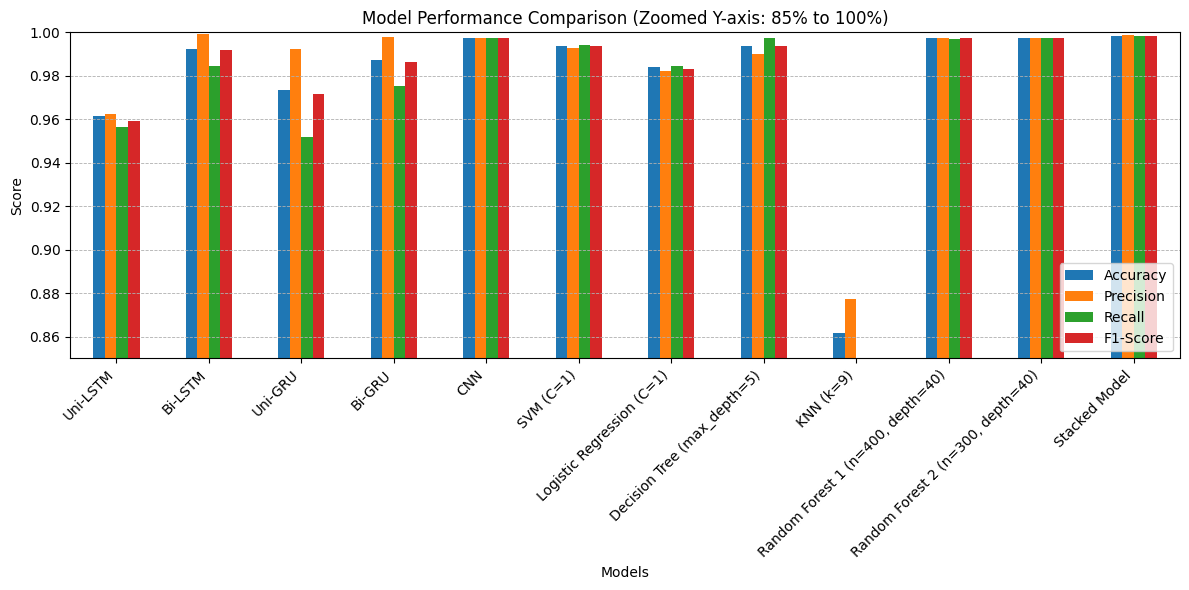

In [82]:
import matplotlib.pyplot as plt
final_table.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Models')
plt.ylim(0.85, 1.00)
plt.grid(axis='y', linestyle='--', linewidth=0.6)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


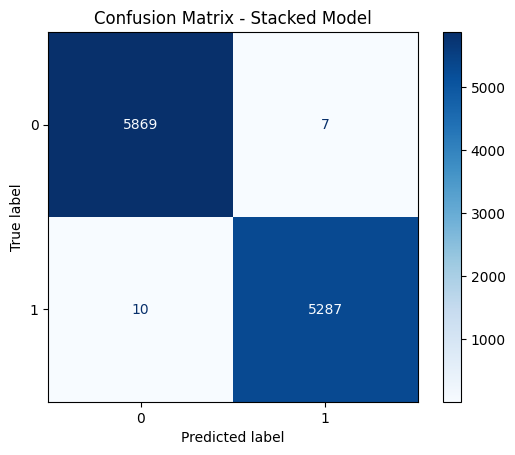

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, meta_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Stacked Model")
plt.show()
